# Histograms as Objects: Tools for Efficient Analysis and Interactivity

### Aman Goel (speaker), Dr. Hans Peter Dembinski, Henry Fredrick Schreiner, Jay Gohil (speaker)

**12th September, 2022**

- **Overview**
    - boost-histogram
    - hist
    - uproot-browser

- **Quick Links**
    - Talk - [Indico](https://indico.cern.ch/event/1150631/contributions/5014273/), [Repository](https://github.com/amangoel185/pyhep-2022-histogramming-talk), (empty) [Zenodo](), [Binder](https://mybinder.org/v2/gh/amangoel185/pyhep-2022-histogramming-talk/HEAD)
    - boost-histogram - [Documetation](https://boost-histogram.readthedocs.io), [Repository](https://github.com/scikit-hep/boost-histogram)
    - hist - [Documentation](https://hist.readthedocs.io), [Repository](https://github.com/scikit-hep/hist)
    - uproot-browser - [Repository](https://github.com/scikit-hep/uproot-browser)

- **Ideas and structure**
    - fundamentals, composition, axes, histograms
    - work with hist, point to boost-histogram here and there
    - 2D histogram example with PyHEP logo
    - save histogram with uproot
    - use the same one in uproot-browser
    - try.jupyter.org for pyodide

## What is a Histogram?

Histograms are grouped frequency distribution based representation of occurence for numerical data points.

![Histogram Image](https://github.com/amangoel185/pyhep-2022-histogramming-talk/assets/histogram.png?raw=true)

### A Hist object is made up of:

- Axis objects
- Storage

### Defining a histogram with Hist

In [1]:
import hist
from hist import Hist
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

Let's use Hist to define a histogram as an object!

#### Classic definition

In [2]:
h = Hist(
    hist.axis.Regular(50, -5, 5, name="S", label="s [units]", flow=False),
    hist.axis.Regular(50, -5, 5, name="W", label="w [units]", flow=False),
    storage=hist.storage.Weight(),
)
print(h)

Hist(
  Regular(50, -5, 5, underflow=False, overflow=False, name='S', label='s [units]'),
  Regular(50, -5, 5, underflow=False, overflow=False, name='W', label='w [units]'),
  storage=Weight()) # Sum: WeightedSum(value=0, variance=0)


#### QuickConstruct

In [3]:
h = (
    Hist.new.Reg(50, -5, 5, name="s", label="s [units]", flow=False)
    .Reg(50, -5, 5, name="w", label="w [units]", flow=False)
    .Weight()
)
print(h)

Hist(
  Regular(50, -5, 5, underflow=False, overflow=False, name='s', label='s [units]'),
  Regular(50, -5, 5, underflow=False, overflow=False, name='w', label='w [units]'),
  storage=Weight()) # Sum: WeightedSum(value=0, variance=0)


### Manipulating the PyHEP logo as an Hist object

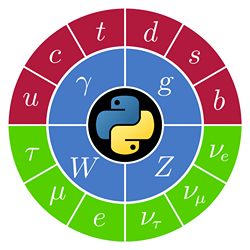

In [4]:
pyhep = Image.open("PyHEP.png")
pyhep

In [5]:
arr = np.asarray(pyhep)[:, :, 2]

In [6]:
rng = np.random.default_rng()
x, y, p = rng.random((3, 200_000))

In [7]:
bx = (x * 200).astype(np.int32)
by = (y * 200).astype(np.int32)

In [8]:
prob = arr[by, bx] / 255

In [9]:
hits = prob > p

In [10]:
X = x[hits]
Y = 1 - (y[hits] / 200 * 200 + (1 / 200))

In [11]:
h = hist.Hist(hist.axis.Regular(400, 0, 1, metadata="x"), hist.axis.Regular(400, 0, 1, metadata="y"))

h.fill(X, Y)

Hist(
  Regular(400, 0, 1, metadata='x', label='Axis 0'),
  Regular(400, 0, 1, metadata='y', label='Axis 1'),
  storage=Double()) # Sum: 117775.0 (118256.0 with flow)

In [12]:
def plt_h2(h):
    x, y = h.axes.edges
    plt.pcolormesh(x.T, y.T, h.view().T)
    plt.gca().set_aspect("equal", "box")
    plt.xlabel(h.axes[0].metadata)
    plt.ylabel(h.axes[1].metadata)

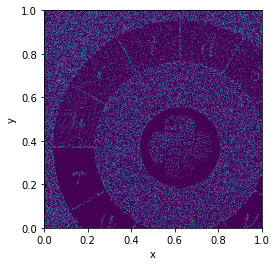

In [13]:
plt_h2(h)

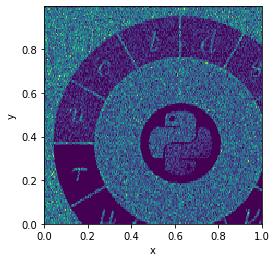

In [14]:
plt_h2(h[:: hist.rebin(2), :: hist.rebin(3)])

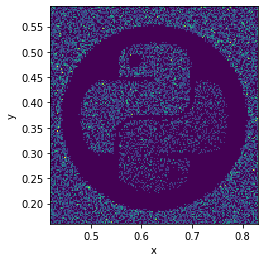

In [15]:
plt_h2(h[hist.loc(0.42):hist.loc(0.83), hist.loc(0.16):hist.loc(0.59)])